# Can we forecast future sales quantities for each product category and type?

C:\Users\shoai\AppData\Local\Temp\ipykernel_20012\448819167.py:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  projected_sales[category] = category_sales.append(pd.Series(index=future_dates, dtype='float64'))
C:\Users\shoai\AppData\Local\Temp\ipykernel_20012\448819167.py:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  projected_sales[category] = category_sales.append(pd.Series(index=future_dates, dtype='float64'))
C:\Users\shoai\AppData\Local\Temp\ipykernel_20012\448819167.py:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  projected_sales[category] = category_sales.append(pd.Series(index=future_dates, dtype='float64'))
C:\Users\shoai\AppData\Local\Temp\ipykernel_20012\448819167.py:23: FutureWarning: The series.appe

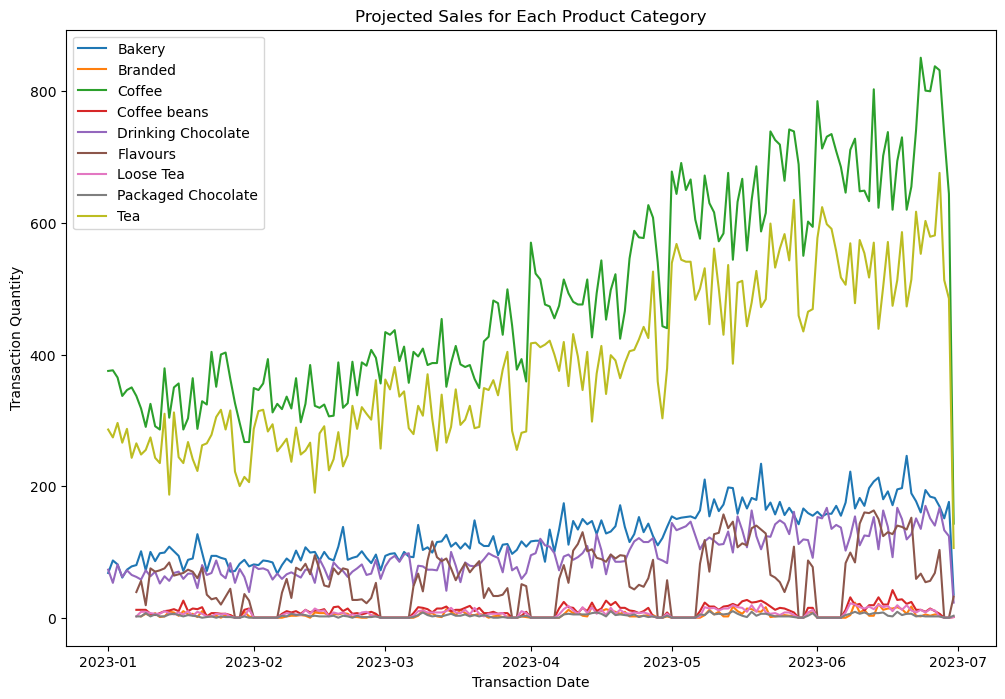

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")  # Replace "your_dataset.csv" with the actual file path

# Convert Transaction Date to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Group by Transaction Date and Product Category and sum up Transaction Quantity
sales_data = df.groupby(['Transaction Date', 'Product Category'])['Transaction Quantity'].sum().reset_index()

# Calculate future date range
end_date = sales_data['Transaction Date'].max()
future_dates = pd.date_range(end_date, end_date + timedelta(days=30), freq='D')[1:]

# Projected sales for each product category
projected_sales = {}
for category, category_data in sales_data.groupby('Product Category'):
    category_sales = category_data.set_index('Transaction Date')['Transaction Quantity']
    category_sales = category_sales.resample('D').sum().fillna(0)
    projected_sales[category] = category_sales.append(pd.Series(index=future_dates, dtype='float64'))

# Plot projected sales for each product category
plt.figure(figsize=(12, 8))
for category, sales in projected_sales.items():
    plt.plot(sales.index, sales.values, label=category)
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Quantity')
plt.title('Projected Sales for Each Product Category')
plt.legend()
plt.show()

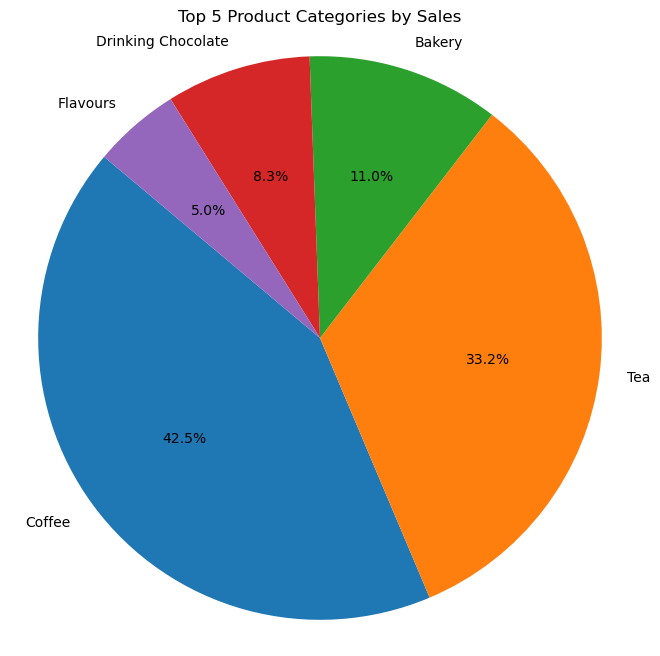

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")  # Replace "your_dataset.csv" with the actual file path

# Convert Transaction Date to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Group by Product Category and sum up Transaction Quantity
category_sales = df.groupby('Product Category')['Transaction Quantity'].sum()

# Select the top 5 product categories
top_categories = category_sales.nlargest(5)

# Plot a pie chart for the top 5 product categories
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Product Categories by Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Can we predict peak transaction times to ensure staffing levels match customer demand?

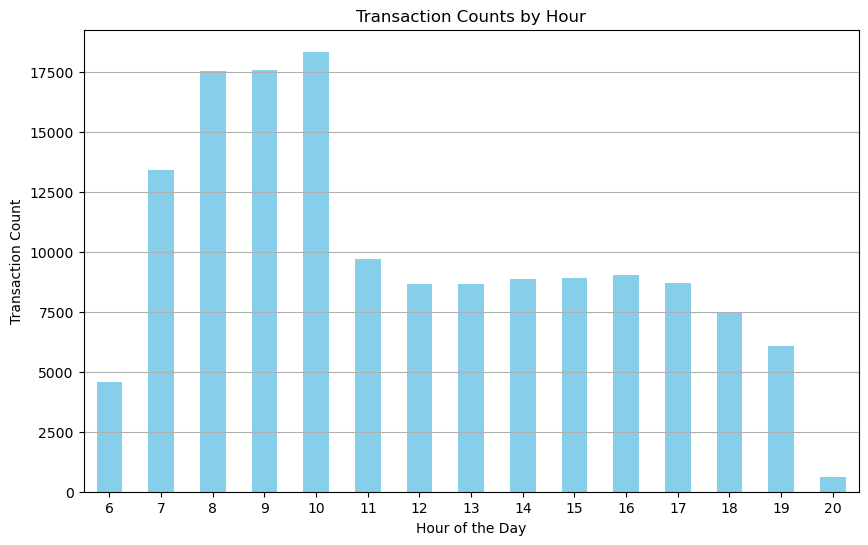

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")  # Replace "your_dataset.csv" with the actual file path

# Convert Transaction Time to datetime format
df['Transaction Time'] = pd.to_datetime(df['Transaction Time'])

# Group by hour and count transactions
hourly_transaction_counts = df.groupby(df['Transaction Time'].dt.hour).size()

# Plot transaction counts by hour
plt.figure(figsize=(10, 6))
hourly_transaction_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by Hour')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()